## ML Review and Gradient Descent Example

In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.

In [1160]:
import sys
sys.version

'3.10.13 (main, Sep 11 2023, 08:16:02) [Clang 14.0.6 ]'

In [1161]:
# Preliminaries - packages to load
%matplotlib inline

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [1162]:
np.random.uniform(0, 10, 5)

array([4.09333869, 8.69106793, 4.84610577, 1.45867482, 6.47952864])

In [1163]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0, 10, num_obs)
x2 = np.random.uniform(0, 10, num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0, 0.5, num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const + theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const, x1, x2]).T

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.

In [1164]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

## Exercise:
Solve the problem two ways:
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.

In [1165]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T, x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

# Solving by Gradient Descent
Another way to solve this problem is to use the method of Gradient Descent.  We will explore this method because (as we will see) Neural Networks are trained by Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

## Exercise (Gradient Descent)

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.
1. Find examples where the learning rate is too high, too low, and "just right".
1. Look at plots of loss function under these conditions.

1. (Gradient Descent) หากค่า learning rate สูงหรือต่ำจนเกินไป มีผลต่อการลู่ของค่าพารามิเตอร์เข้าหาค่าที่ควรจะเป็นอย่างไร

In [1166]:
# learning_rate = 0.03
#TOO HIGHT

หากปรับค่า learning rate สูงเกินไป จะทำให้การลู่ของค่าพารามิเตอร์ แกว่งไปมา

In [1167]:
# learning_rate = 0.001
#just right

หากปรับค่า learning rate ให้อยู่จุดที่พอดี จะได้กราฟการลู่เข้าของค่าพารามิเตอร์ที่ละเอียด และไกล้ค่าจริง 

In [1168]:
learning_rate = 0.00001
# TOO LOW

หากปรับค่า learning rate ต่ำเกินไปอาจส่งผลให้การลู่เข้าของพารามิเตอร์ไม่ถึงค่าที่ต้องการ

In [1169]:
## Parameters to play with
num_iter = 1000
theta_initial = np.array([3, 3, 3])

In [1170]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros((num_iter+1, 3))
theta_path[0, :] = theta_initial

loss_vec = np.zeros(num_iter)

## Main Gradient Descent loop (for a fixed number of iterations)
for i in range(num_iter):
    y_pred = np.dot(theta.T, x_mat.T)
    loss_vec[i] = np.sum((y - y_pred)**2)
    grad_vec = (y - y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    theta = theta + learning_rate*grad_vec
    theta_path[i+1, :] = theta

(0.0, 500.0)

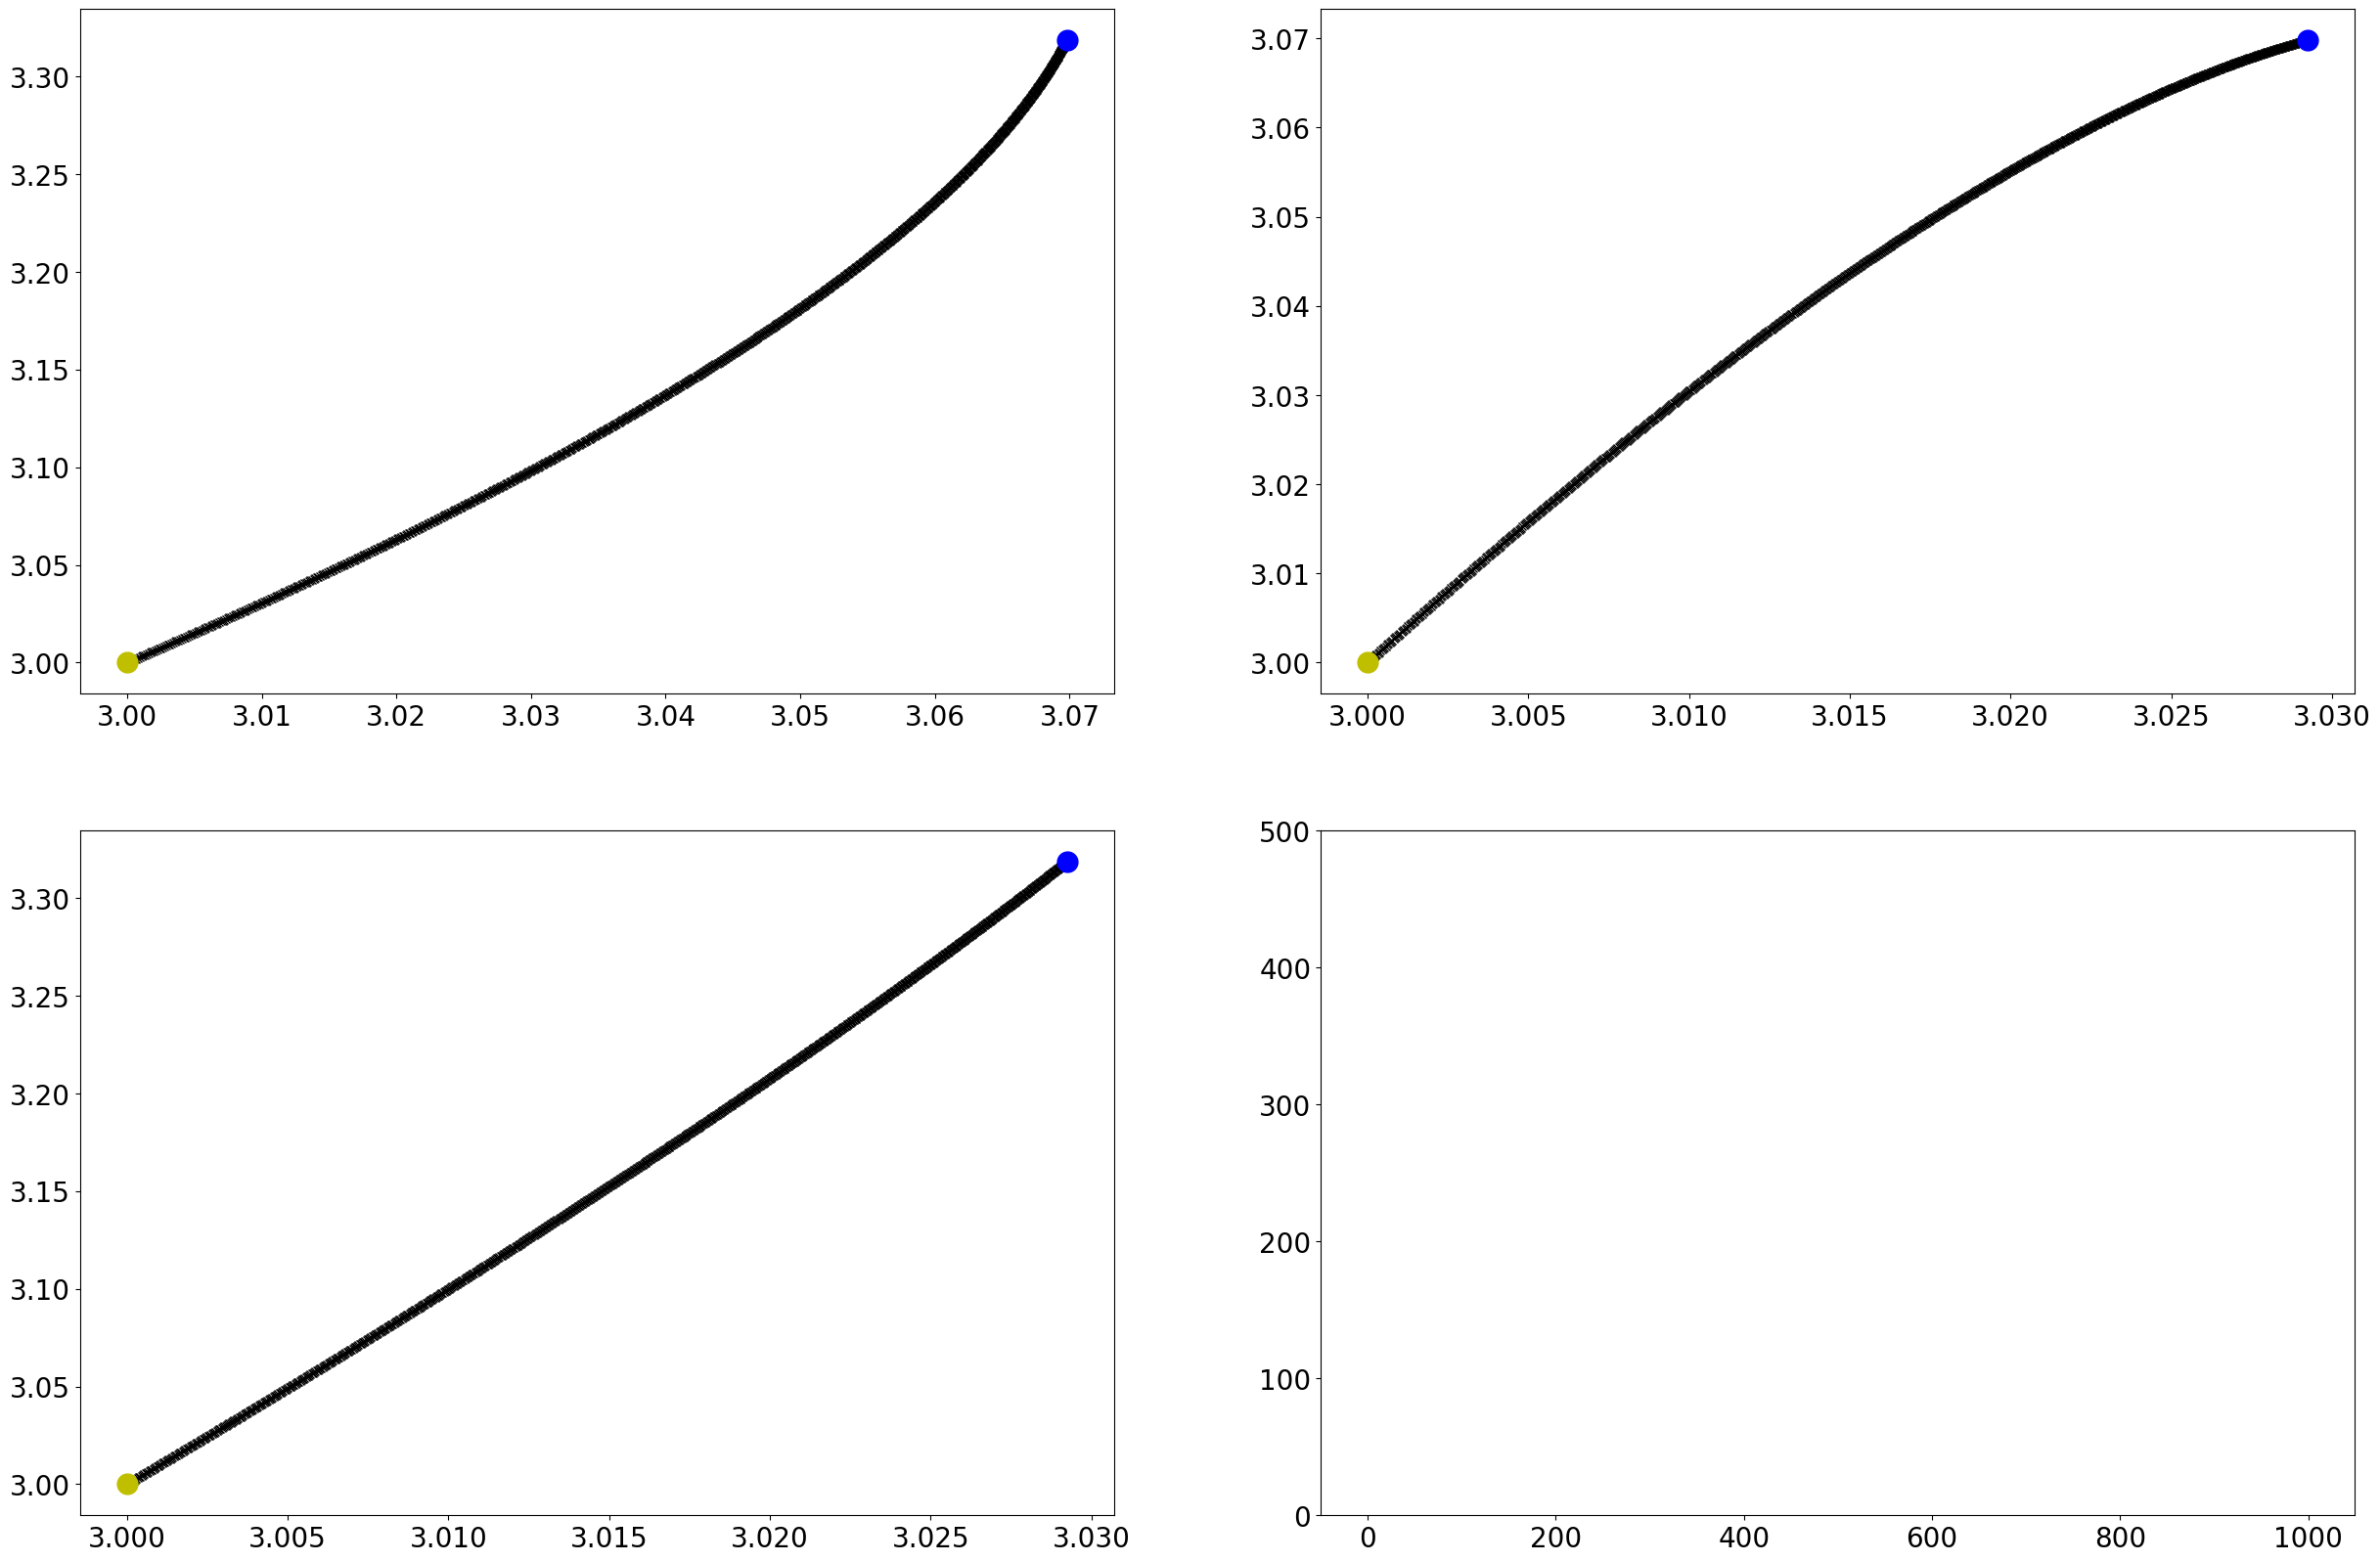

In [1171]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## Plot the loss function

## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.

## Exercise (Stochastic Gradient Descent)
The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

1. Run the code and plot the graphs.  What do you notice?
1. Modify the code so that it randomly re-orders the data.  How do the sample trajectories compare? [STUDENT TO COMPLETE THIS]

In [1172]:
## Parameters to play with
learning_rate = 0.005
num_iter = 10   # The number of "steps" will be num_iter * numobs
theta_initial = np.array([3, 3, 3])

In [1173]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1, 3))
theta_path[0, :] = theta_initial
loss_vec = np.zeros(num_iter*num_obs)

In [1174]:
# ## Main SGD loop
# count = 0
# for i in range(num_iter):
#     for j in range(num_obs):
#         count += 1
#         y_pred = np.dot(theta.T, x_mat.T)
#         loss_vec[count-1] = np.sum((y - y_pred)**2)
#         grad_vec = (y[j] - y_pred[j])*(x_mat[j,:])
#         theta = theta + learning_rate*grad_vec
#         theta_path[count, :] = theta

In [1175]:
# Student to write code below.
count = 0
idx = np.arange(num_obs)
for i in range(num_iter):
    np.random.shuffle(idx)
    for j in idx:
        count += 1
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y - y_pred)**2)
        grad_vec = (y[j] - y_pred[j])*(x_mat[j,:])
        theta = theta + learning_rate*grad_vec
        theta_path[count, :] = theta

2.(Stochastic Gradient Descent) การสลับลำดับของข้อมูลที่ใช้ในการหาค่า gradient ส่งผลต่อกราฟ loss อย่างไร

การสลับลำดับของข้อมูลทำให้กราฟ มีค่าเป็นลักษณะสลับฟันปลา ถี่มากขึ้น 

(0.0, 500.0)

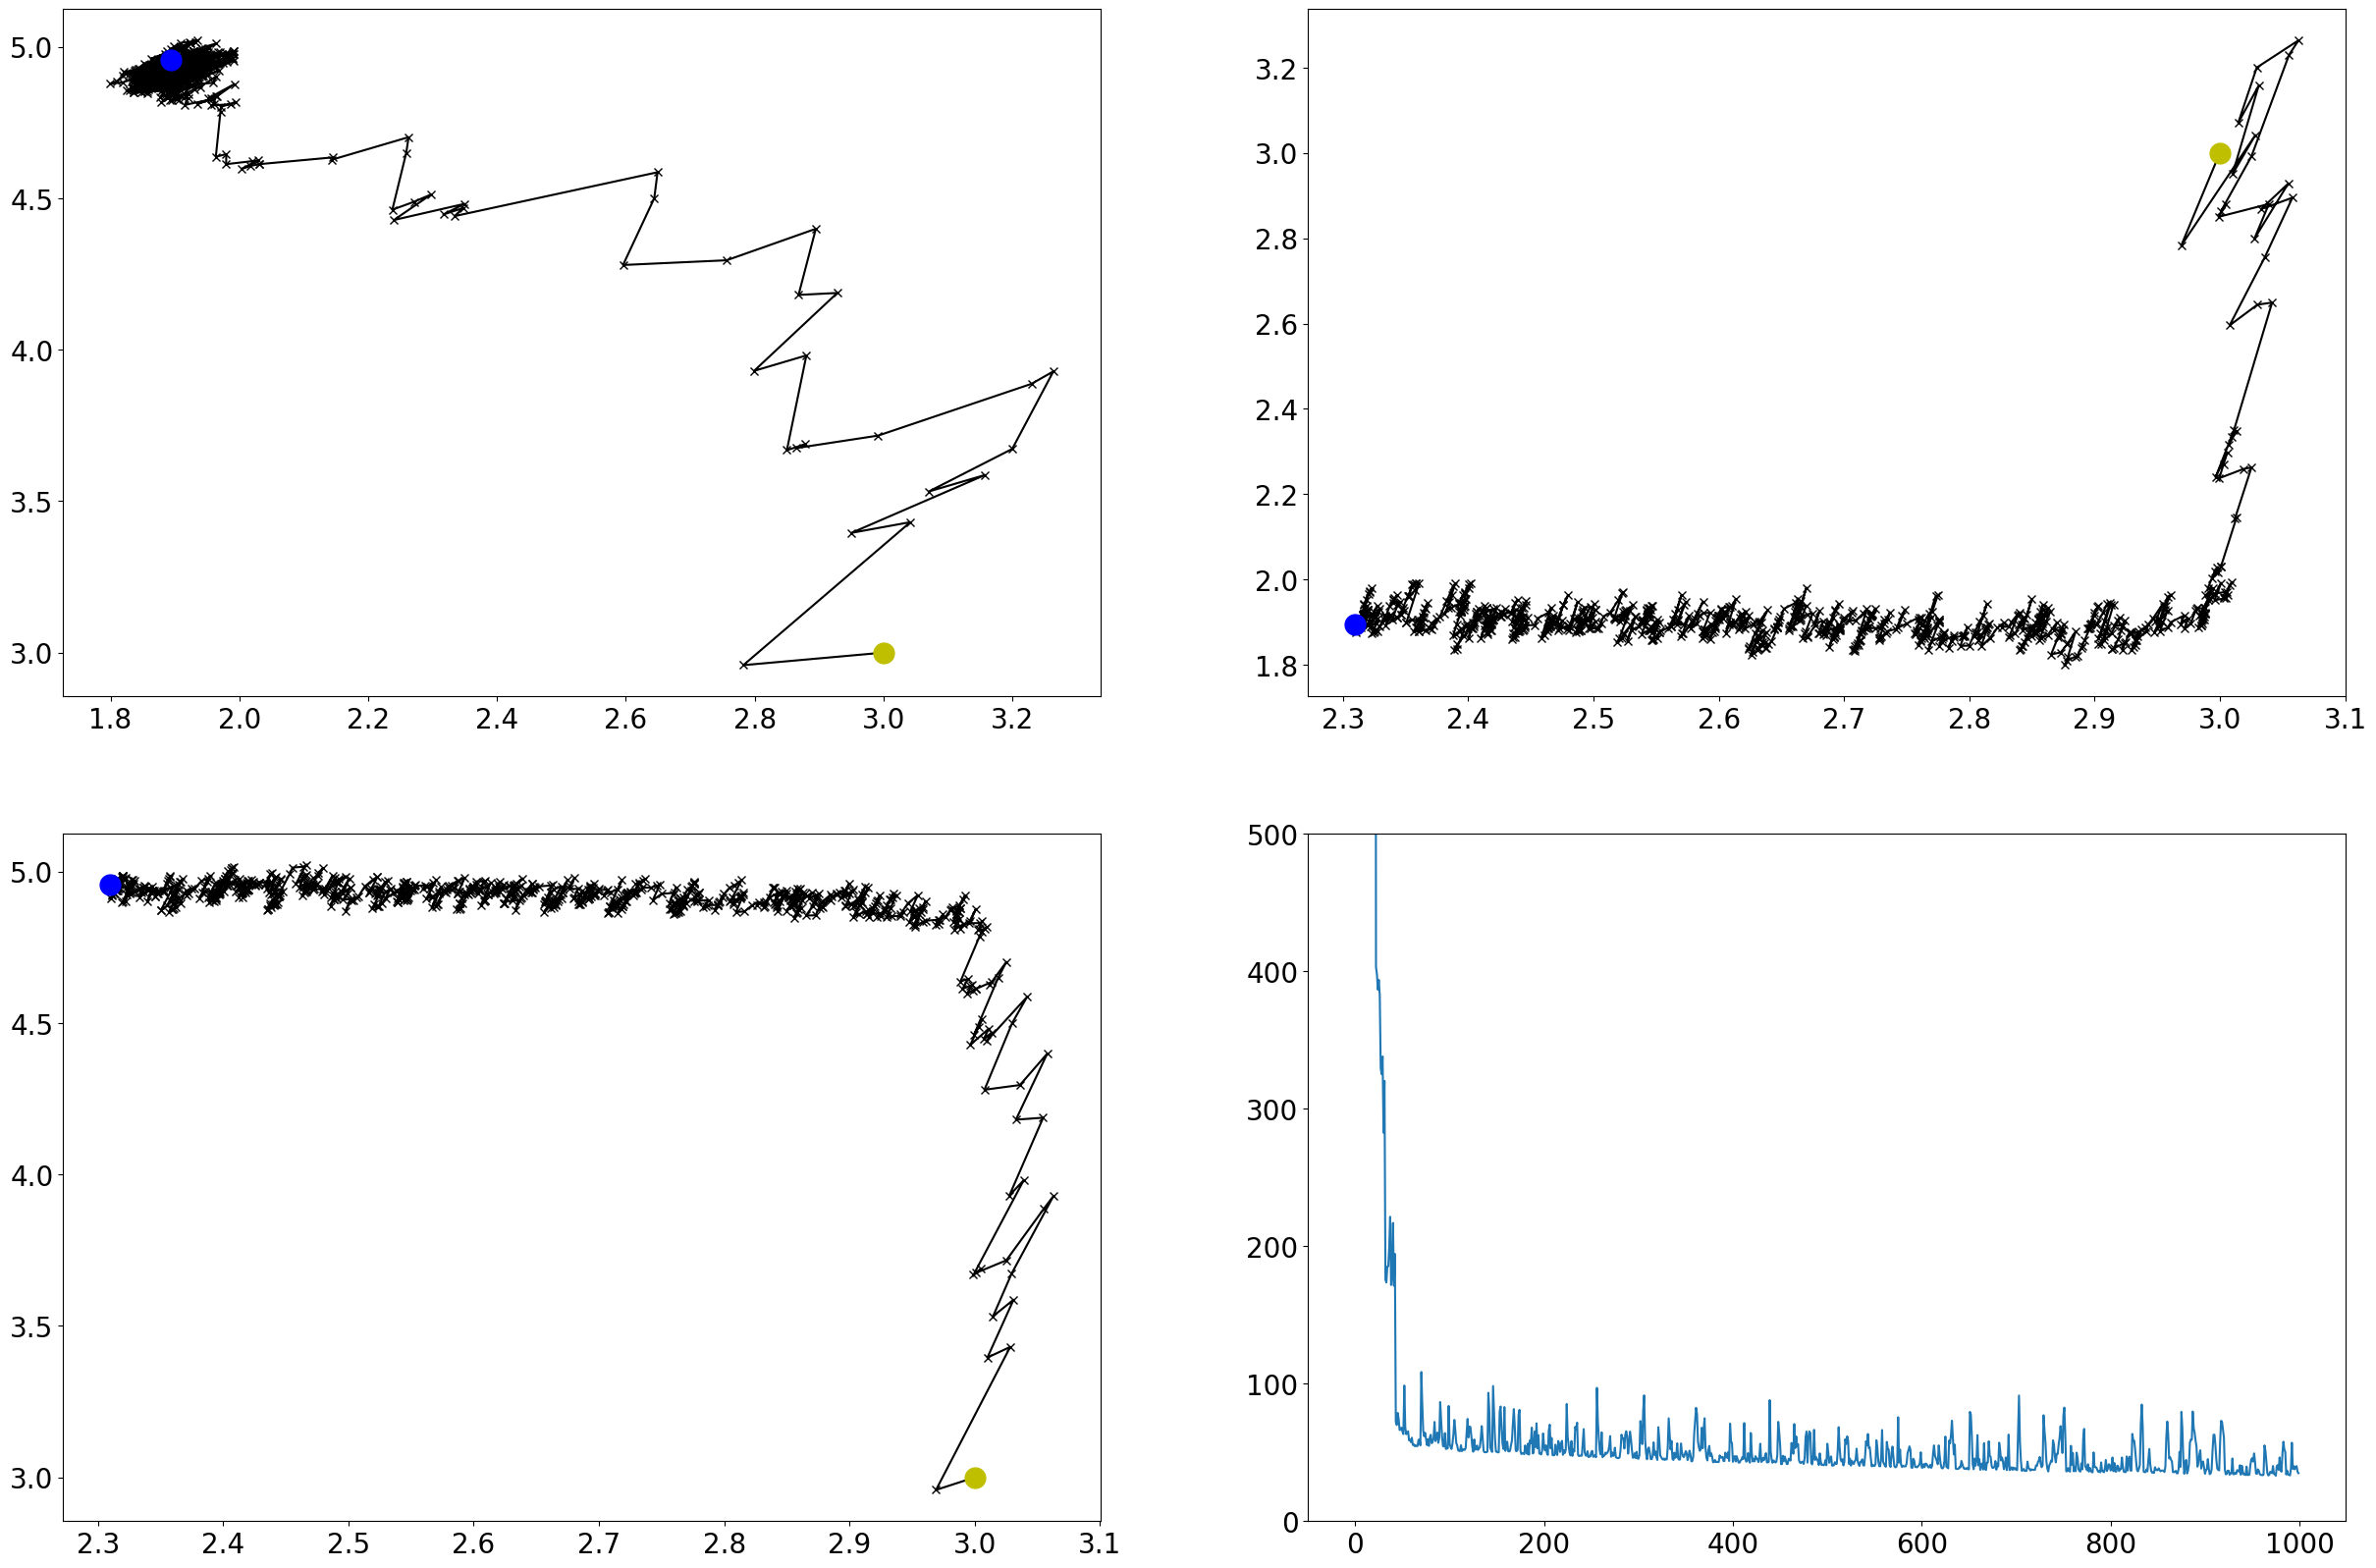

In [1176]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## Exercise (Mini Batch Gradient Descent)
The below code runs Mini Batch Gradient Descent.  

1. Pick a batch size, run the code, and then plot the trajectory of your gradient descent.
1. Observe and explain how the batch size affects the trajectory.

In [1177]:
batch_size = 10 #ปรับค่าให้ลดลง
# batch_size = 50 #ปรับค่าให้เพิ่มขึ้น

3.(Mini Batch Gradient Descent) ค่าของ batch size มีผลต่อการเทรนโมเดลอย่างไร

เมื่อปรับ batch size น้อย ทำให้การเทรนโมเดลในช่วงแรกกราฟ การลูี่เข้าของพารามิเตอร์มีการแกว่งไปมา
แต่ปรับ batch size มากขึ้น ทำให้การเทรนโมเดลในช่วงแรกกราฟ จนถึงสุดท้ายลดการแกว่งไปมา

In [1178]:
# num_iter = 100 #TOO LOW
# num_iter = 1000 #JUST RIGHT
num_iter = 100000 #TOO HIGH

4.(Mini Batch Gradient Descent) จำนวน epoch ที่สูงหรือต่ำจนเกินไป มีผลต่อการเทรนโมเดลอย่างไร

จาก code ค่า num iter แปรผันตรงกับ num epoch
การปรับให้ epoch น้อยเกิดทำให้เทรนโมเดลช้า ค่าการลู่เข้าของพารามิเตอร์ไม่นิ่ง และเกิด loss เยอะ
แต่ถ้าปรับให้สูงเกิน จะทำให้เทรนได้เร็วขึ้น ค่าการลู่เข้าของพารามิเตอร์เข้าไกล้ค่าที่ต้องการอยากรวดเร็วและ เกิด loss น้อย

In [1179]:
## Parameters to play with
learning_rate = 0.002


steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)
num_epoch = num_iter//steps_per_epoch  # The number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch*steps_per_epoch)+1, 3))
theta_path[0, :]= theta_initial
loss_vec = np.zeros(num_epoch*steps_per_epoch)

count = 0
idx = np.arange(num_obs)
for i in range(num_epoch):
    np.random.shuffle(idx)
    y     = y[idx]
    x_mat = x_mat[idx]
    for j in range(steps_per_epoch):
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y - y_pred)**2)
        grad_vec = (y[beg:end] - y_pred[beg:end]).dot(x_mat[beg:end, :])/batch_size
        theta = theta + learning_rate*grad_vec
        theta_path[count, :] = theta

(0.0, 500.0)

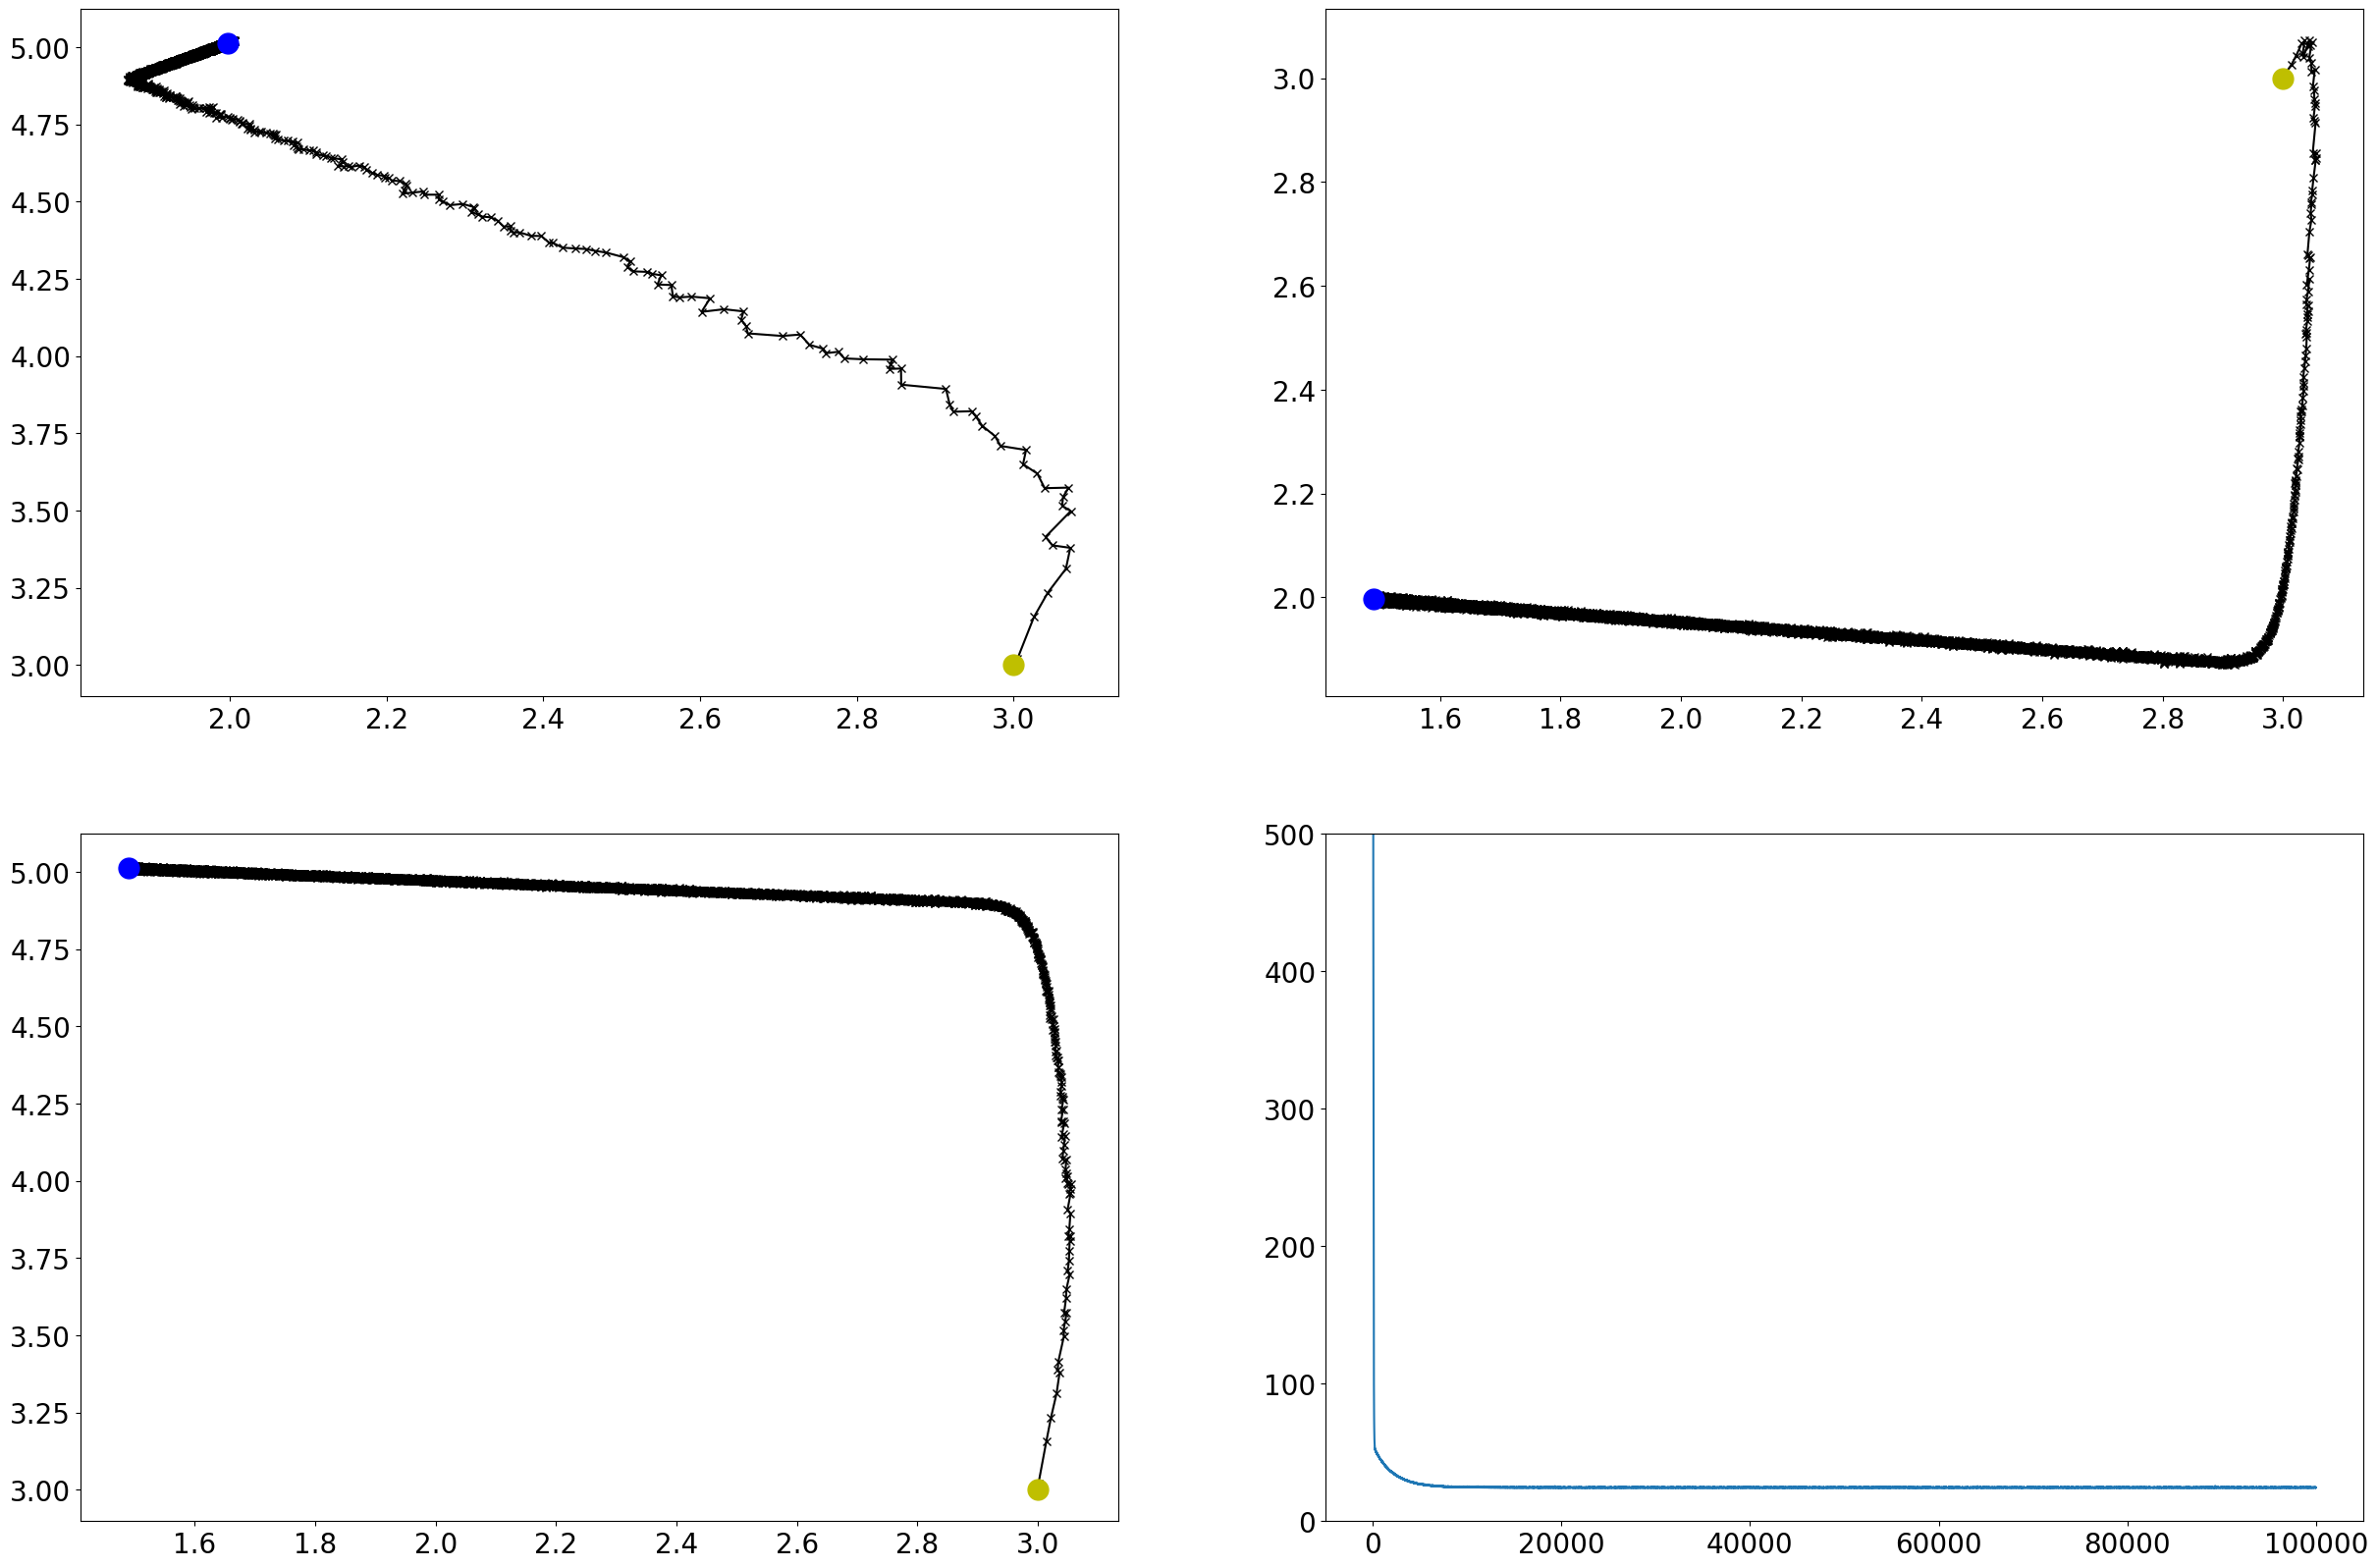

In [1180]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

# ขอให้ปรับแก้ไขโค้ดตามลักษณะของคำถาม แล้วจึงตอบคำถามต่อไปนี้
### โดยให้เพิ่ม Cell สำหรับแต่ละคำถาม เพื่อใช้เขียนโค้ดและใช้ผลประกอบคำอธิบาย

1. (Gradient Descent) หากค่า learning rate สูงหรือต่ำจนเกินไป มีผลต่อการลู่ของค่าพารามิเตอร์เข้าหาค่าที่ควรจะเป็นอย่างไร
1. (Stochastic Gradient Descent) การสลับลำดับของข้อมูลที่ใช้ในการหาค่า gradient ส่งผลต่อกราฟ loss อย่างไร
1. (Mini Batch Gradient Descent) ค่าของ batch size มีผลต่อการเทรนโมเดลอย่างไร
1. (Mini Batch Gradient Descent) จำนวน epoch ที่สูงหรือต่ำจนเกินไป มีผลต่อการเทรนโมเดลอย่างไร